In [2]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff

# Laad het CSV-bestand
file_path = '../combined_cleaned_tennis_data.csv'
tennis_data = pd.read_csv(file_path)

# Converteer de relevante kolommen naar numeriek
tennis_data['w_bpSaved'] = pd.to_numeric(tennis_data['w_bpSaved'], errors='coerce')
tennis_data['w_bpFaced'] = pd.to_numeric(tennis_data['w_bpFaced'], errors='coerce')
tennis_data['l_bpSaved'] = pd.to_numeric(tennis_data['l_bpSaved'], errors='coerce')
tennis_data['l_bpFaced'] = pd.to_numeric(tennis_data['l_bpFaced'], errors='coerce')

# Bereken het percentage van gewonnen breakpoints
tennis_data['w_bpWinPercent'] = (tennis_data['w_bpSaved'] / tennis_data['w_bpFaced']) * 100
tennis_data['l_bpWinPercent'] = (tennis_data['l_bpSaved'] / tennis_data['l_bpFaced']) * 100

fig_box = px.box(
    tennis_data.melt(value_vars=['w_bpWinPercent', 'l_bpWinPercent'], var_name='Player', value_name='Win Percentage'),
    x='Player',
    y='Win Percentage',
    labels={'Player': 'Speler', 'Win Percentage': 'Winstpercentage Breakpoints (%)'},
    title='Vergelijking van Winstpercentage Breakpoints tussen Winnaars en Verliezers'
)
fig_box.update_xaxes(tickvals=['w_bpWinPercent', 'l_bpWinPercent'], ticktext=['Winnaars', 'Verliezers'])
fig_box.show()

Bovenstaande boxplot geeft de vergelijking weer tussen hoe vaak een breakpunt gewonnen wordt tussen de winnaar en verliezer van een wedstrijd. Hier is op de verticale as het winstpercentage te zien en op de horizontale as de speler. Uit de visualisatie blijkt dat de winnaar van de wedstijd relatief gezien vaker een breakpunt wint dan de verliezer. Het gemiddelde ligt bij de winnende partij een stuk hoger, wat aangeeft dat ze beter presteren onder druk.

Het spelen van een breakpunt is binnen tennis een punt waar veel spanning bij komt kijken. Het winnen van zo'n punt vereist dus een sterke mentale gesteldheid. Het mentaal sterker worden is iets wat getraind kan worden. Zodra dit goed getraind is, zal het percentage gewonnen breakpoint omhoog gaan bij de verliezende partij.

Dit mentale aspect kan getrained worden door tijdens training rustig voor te bereiden tijdens het spelen van een breakpunt, maar ook door met een sportpsycholoog te praken, oefenen in vergelijkbare spannende situaties en ademhalingsoefeningen. De winnende partij zit vaak beter in de wedstrijd op mentaal gebied waardoor de breakpunt ook vaker gewonnen zullen worden. 


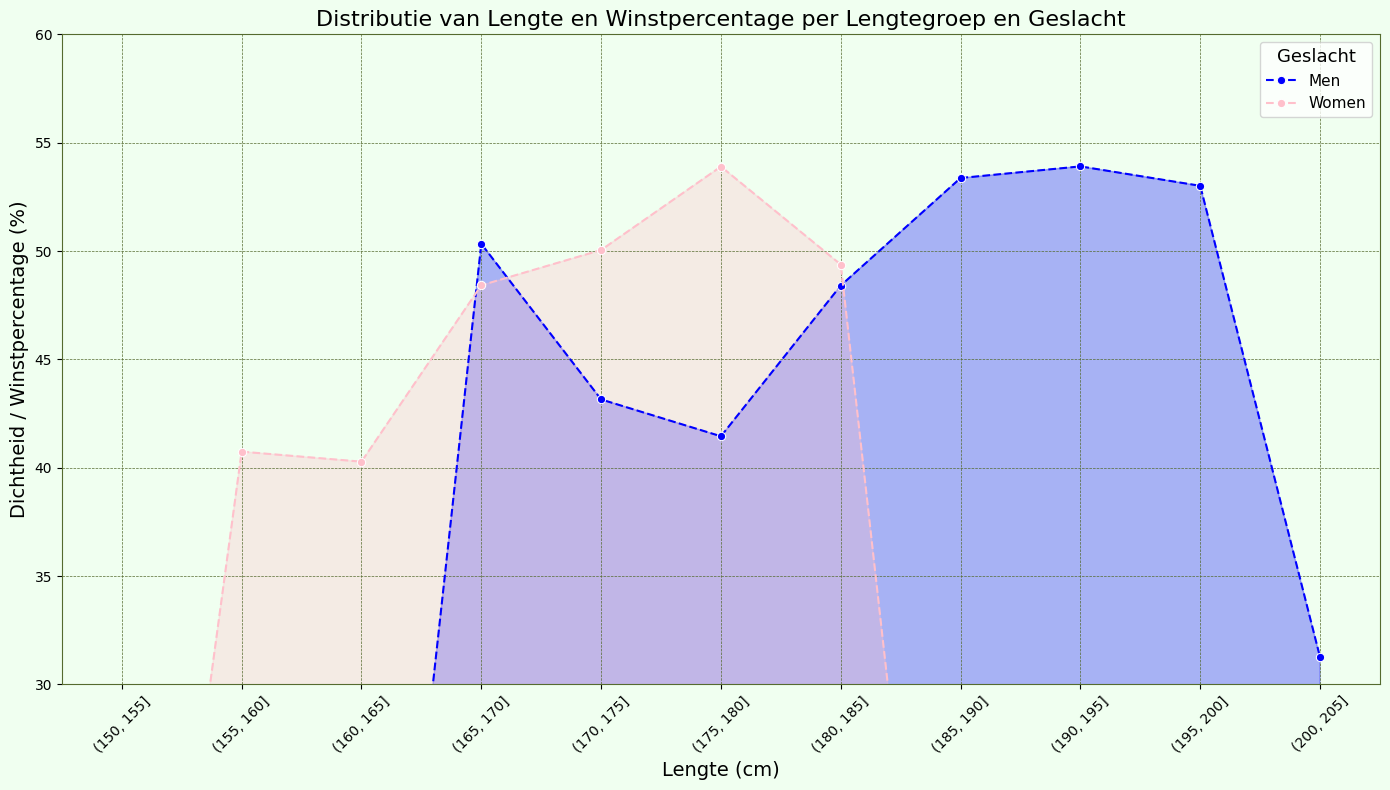

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Laad de dataset
df = pd.read_csv('../combined_cleaned_tennis_data.csv')

# Controleer op ontbrekende waarden in de kolommen 'winner_ht' en 'loser_ht'
df = df.dropna(subset=['winner_ht', 'loser_ht'])

# Combineer de lengtekolommen voor winnaars en verliezers en voeg een kolom voor geslacht en resultaat toe
winner_heights = df[['winner_ht', 'gender']].rename(columns={'winner_ht': 'height'})
winner_heights['result'] = 'win'

loser_heights = df[['loser_ht', 'gender']].rename(columns={'loser_ht': 'height'})
loser_heights['result'] = 'loss'

# Combineer de twee dataframes
heights_df = pd.concat([winner_heights, loser_heights])

# Definieer lengtegroepen
height_bins = range(150, 210, 5)  # Van 150cm tot 210cm met stappen van 5cm
heights_df['height_group'] = pd.cut(heights_df['height'], bins=height_bins)

# Bereken de winstpercentages per lengtegroep en geslacht
win_loss_counts = heights_df.groupby(['height_group', 'gender', 'result'], observed=False).size().unstack(fill_value=0)
win_loss_counts['total'] = win_loss_counts['win'] + win_loss_counts['loss']
win_loss_counts['win_percentage'] = win_loss_counts['win'] / win_loss_counts['total'] * 100

# Reset index en converteer height_group naar string
win_loss_counts = win_loss_counts.reset_index()
win_loss_counts['height_group'] = win_loss_counts['height_group'].astype(str)

# Controleer op ontbrekende waarden in win_percentage
win_loss_counts['win_percentage'] = win_loss_counts['win_percentage'].fillna(0)

# Verwijder eventuele ontbrekende waarden in de kolommen 'height_group' en 'gender' in heights_df
heights_df = heights_df.dropna(subset=['height_group', 'gender'])

# Zorg ervoor dat height_group als string wordt behandeld in heights_df
heights_df['height_group'] = heights_df['height_group'].astype(str)

# Maak een nieuwe DataFrame voor de gecombineerde visualisatie
combined_df = heights_df.merge(win_loss_counts[['height_group', 'gender', 'win_percentage']], on=['height_group', 'gender'], how='left')

# Plot de gecombineerde grafiek
plt.figure(figsize=(14, 8))

# Kleurenpalet aanpassen voor KDE plot
palette = {'Men': 'blue', 'Women': 'pink'}

# KDE plot voor lengteverdeling
sns.kdeplot(data=combined_df, x='height', hue='gender', common_norm=False, palette=palette, fill=True, alpha=0.5)

# Lijnplot voor winstpercentages met opvulling
for gender in win_loss_counts['gender'].unique():
    gender_data = win_loss_counts[win_loss_counts['gender'] == gender]
    plt.fill_between(gender_data['height_group'], gender_data['win_percentage'], alpha=0.3, color=palette[gender])
    sns.lineplot(data=gender_data, x='height_group', y='win_percentage', label=gender, linestyle='--', marker='o', color=palette[gender])

plt.title('Distributie van Lengte en Winstpercentage per Lengtegroep en Geslacht', fontsize=16)
plt.xlabel('Lengte (cm)', fontsize=14)
plt.ylabel('Dichtheid / Winstpercentage (%)', fontsize=14)
plt.ylim(30, 60)  # Aangepast bereik van de y-as
plt.xticks(rotation=45)
plt.legend(title='Geslacht', title_fontsize='13', fontsize='11')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gcf().set_facecolor('honeydew')
plt.gca().set_facecolor('honeydew')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='darkolivegreen')
plt.gca().spines['top'].set_color('darkolivegreen')
plt.gca().spines['bottom'].set_color('darkolivegreen')
plt.gca().spines['left'].set_color('darkolivegreen')
plt.gca().spines['right'].set_color('darkolivegreen')

plt.tight_layout()

plt.show()